## Classification Modeling
Objectives:
* Buid a classifier model to determine whether a customer will soon churn from Syria Tell
* Establish the modeling with the best performance
* Determine features that influence customers churn decisions
* Evaluate any predicable patterns

##### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns

# preprocessing 

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

#Sampling
from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Logistic Regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Naive Bayes
from scipy import stats

# Decision Trees
from math import log #to calculate entropy
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# Regression with CART Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# GridSearch
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Gradient Boosting
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# XGBoost
import xgboost as xgb # xgb.XGBClassifier()

# SVM
from sklearn import svm
from sklearn.svm import SVC
import statsmodels as sm


# Pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')

#### Import Data

In [2]:
data = pd.read_csv ("CSV/data_cleaned.csv").drop('Unnamed: 0', axis=1)

data.head ()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge,total_calls,total_minutes
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,0,76.0,303,717.0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,59.0,332,625.0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,62.0,333,539.0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,67.0,255,565.0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,52.0,359,512.0


In [3]:
# checking for the dataset shape
data.shape

(3333, 23)

In [4]:
#cheking for unique values
data ['churn'].value_counts ()

0    2850
1     483
Name: churn, dtype: int64

In [5]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

### Classification Model Functions

Developing functions will be important to simplyfy the modeling process

##### Preduction Function

In [6]:
# Python funtion named model_predictions that takes five input arguments
def model_predictions(model, X_train, X_test, y_train, y_test):
    """
    Input: Training and test sets of predictors 
    Output: The accuracy_score of the given sets for each class..
    """
    #Use model to make predictions on the training and test data and store predicted values in a variable
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    # Calculate the absolute differenced between the true target values and predicted values for the training data. Store the differnces in the train_residual variable
    train_residuals = np.abs(y_train - y_hat_train)
    # print the training values
    print('Training Values','\n', pd.Series(train_residuals).value_counts())
    # print teh training accuracy
    print('------------------------------------')
    print('Training Accuracy','\n', pd.Series(train_residuals).value_counts(normalize=True))
    print('\n\n')
    # Calculate the absolute difference between the true target values and predicted values
    test_residuals = np.abs(y_test - y_hat_test)
    print('Testing Values: ','\n', pd.Series(test_residuals).value_counts())
    print('------------------------------------')
    print('Testing Accuracy: ','\n', pd.Series(test_residuals).value_counts(normalize=True))

#### ROC Curve Function

In [7]:
# A function that takes in five arguments
def plot_roc(model, X_train, X_test, y_train, y_test):

    """
    Input: Model, Train and Test data.
    Output: Train and Test AUC, Roc Curve for Train and Test sets.
    This function works for classification models with decision_function attribute.
    """
    # Calculate the decion function scores for the training data
    y_train_score = model.decision_function(X_train)
    # Calculate the decision function scores for the test
    y_test_score = model.decision_function(X_test)
    # Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and the associated thresholds for the ROC curve
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    # Calculate the FPR, TPR for the test data
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    # Calculate the area and the the curve (AUC) for ROC curve of the training data
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [8]:
def plot_roc_pp(model, X_train, X_test, y_train, y_test):

    """
    Input: Model, Train and Test data.
    Output: Train and Test AUC, Roc Curve for Train and Test sets.
    This function works for classification models with predict_proba attribute.
    """
    y_train_score = model.predict_proba(X_train)
    y_test_score = model.predict_proba(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score [:,1])
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score [:,1])
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

##### Confusion Matrix Function

In [9]:
def confusion_matrix(model, X_test, y_test):

    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Greens)
    plt.show()

    y_pred = model.predict(X_test)

    print('------------------------------------')
    # print('Accuracy Score:')
    # print(accuracy_score(y_test, y_pred)
    print("Testing Accuracy for Our Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))

    
    print('------------------------------------')
    print('Classification Matrix:')
    print(classification_report(y_test, y_pred))

In [10]:
##### Model Control Function

In [11]:
def model_control(model, X_train, X_test, y_train, y_test):

    """
    This function includes all the functions we created above.
    ROC Curve has decision_function attribute.
    """

    model.fit(X_train, y_train)
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    print('------------------------------------')

    model_predictions(model, X_train, X_test, y_train, y_test)
    confusion_matrix(model, X_test, y_test)
    plot_roc(model, X_train, X_test, y_train, y_test)

In [12]:
def model_control_pp(model, X_train, X_test, y_train, y_test):

    """
    This function includes all the functions we created above.
    Roc Curve has predict_proba attribute.
    """
    
    model.fit(X_train, y_train)
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    print('------------------------------------')
    
    model_predictions(model, X_train, X_test, y_train, y_test)
    confusion_matrix(model, X_test, y_test)
    plot_roc_pp(model, X_train, X_test, y_train, y_test)

##### Feature Importance Plot Function


In [13]:
def plot_feature_importances(model, X, X_train):
    n_features = X_train.shape[1]
    sns.set_style('darkgrid')
    plt.figure(figsize=(8, 11))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values, fontsize=13) 
    plt.xlabel('Importance', fontsize=16)
    plt.ylabel('Feature', fontsize=16)
    plt.title('Feature Importance', fontsize=20)

### Model

In [14]:
### Defining X and y values

In [15]:
y = data['churn']
X = data.drop(['churn', 'state', 'area_code'], axis=1)

### Baseline Model : Logistic Regression

##### Model

In [16]:
# Train-test split, test size 75% and randomn_state of 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)


In [17]:
# Standarding the training data using the StandardScaler
# Use RFE to select the top 10 columns to fit out model
# Set random_state to 123 for our Logistic Regression model and determine parameters. 
scaler = StandardScaler()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
model = LogisticRegression(fit_intercept=False, 
                           C=10e16,  
                           solver='liblinear',
                           class_weight='balanced', 
                           max_iter=10000, 
                           random_state=123)                        


pipeline_lr = Pipeline(steps=[('s', rfe), 
                              ('ss', scaler), 
                              ('m', model)])

# Fit the model

pipeline_lr.fit(X_train, y_train)

print('Train Score:', pipeline_lr.score(X_train, y_train))
print('Test Score:', pipeline_lr.score(X_test, y_test))


Train Score: 0.6502601040416166
Test Score: 0.6642685851318945


* The training score (0.6503) indicates that the model correctly classifies around 65.03% of the samples in the training dataset.
* The test score (0.6643) indicates that the model correctly classifies around 66.43% of the samples in the test dataset.
* These scores suggest that the model's performance is better on the test data compared to the training data, which is often a good sign.

##### Predictions

In [18]:
# Using model_predictions function for checking the accuracy of predicting each class for both our train and test datasets.
model_predictions(pipeline_lr, X_train, X_test, y_train, y_test)


Training Values 
 0    1625
1     874
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.65026
1    0.34974
Name: churn, dtype: float64



Testing Values:  
 0    554
1    280
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.664269
1    0.335731
Name: churn, dtype: float64


Training Values:

* For class 0 (label 0), there are 1625 samples in the training dataset.
* For class 1 (label 1), there are 874 samples in the training dataset.
Training Accuracy:

* For class 0 (label 0), the accuracy is approximately 65.03% (0.65026).
* For class 1 (label 1), the accuracy is approximately 34.97% (0.34974).
* These results indicate that for the training dataset, the model correctly classifies about 65.03% of class 0 samples and about 34.97% of class 1 samples. The overall training accuracy is 65.03%, which matches the training accuracy mentioned in your previous code.

Testing Values:

* For class 0 (label 0), there are 554 samples in the testing dataset.
* For class 1 (label 1), there are 280 samples in the testing dataset.
Testing Accuracy:

* For class 0 (label 0), the accuracy is approximately 66.43% (0.664269).
* For class 1 (label 1), the accuracy is approximately 33.57% (0.335731).
* In the testing dataset, the model correctly classifies about 66.43% of class 0 samples and about 33.57% of class 1 samples. The overall testing accuracy is 66.43%, which also matches the testing accuracy mentioned in your previous code.

Interpretation:

The training and testing accuracy scores for class 0 are roughly similar, indicating that the model performs consistently for this class in both datasets.
However, the training and testing accuracy scores for class 1 show a significant difference. The model performs better on class 1 in the training dataset (34.97%) compared to the testing dataset (33.57%).
It's essential to consider other evaluation metrics (such as precision, recall, and F1-score) and potentially address class imbalance issues if present in your dataset to obtain a more comprehensive understanding of the model's performance. The accuracy results suggest that the model is performing better than random guessing, but there may be room for improvement, especially for class 1.







##### Confusion Matrix


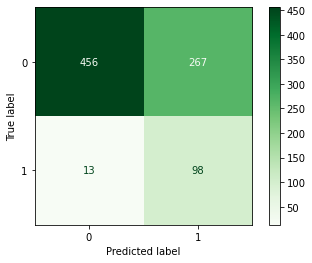

------------------------------------
Testing Accuracy for Our Classifier: 66.43%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      0.63      0.77       723
           1       0.27      0.88      0.41       111

    accuracy                           0.66       834
   macro avg       0.62      0.76      0.59       834
weighted avg       0.88      0.66      0.72       834



In [19]:
confusion_matrix(pipeline_lr, X_test, y_test)


* Testing Accuracy: The testing accuracy for the classifier is 66.43%. This means that the model correctly predicted the class labels for approximately 66.43% of the samples in the testing dataset.
* Precision: Precision is a measure of how many of the positive predictions made by the model are correct. In this case:

* For class 0 (label 0), the precision is 0.97. This indicates that when the model predicts class 0, it is correct 97% of the time.
* For class 1 (label 1), the precision is 0.27. This means that when the model predicts class 1, it is correct only 27% of the time.
* Recall (Sensitivity): Recall is a measure of how many of the actual positive cases the model correctly identified. In this case:

* For class 0 (label 0), the recall is 0.63. This indicates that the model correctly identifies 63% of the actual class 0 cases.
* For class 1 (label 1), the recall is 0.88. This means that the model correctly identifies 88% of the actual class 1 cases.
* F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case:

* For class 0 (label 0), the F1-score is 0.77.
* For class 1 (label 1), the F1-score is 0.41.


#### ROC Curve

plot_roc(pipeline_lr, X_train, X_test, y_train, y_test)


The AUC value for the training dataset is approximately 0.8075. AUC measures the overall performance of a classification model. An AUC of 0.5 indicates that the model performs no better than random chance, while an AUC of 1.0 indicates a perfect model. In this case, an AUC of 0.8075 suggests that the model has a good ability to distinguish between the positive and negative classes in the training data
A higher AUC on the testing dataset (0.8378) compared to the training dataset (0.8075) suggests that the model is generalizing well and is likely not overfitting. Generally, a higher AUC is desirable as it means the model is better at classifying instances.
In summary, the ROC curves and AUC values indicate that the logistic regression model performs well in distinguishing between the classes on both the training and testing datasets. The higher AUC on the testing dataset suggests that the model's performance generalizes well to unseen data, which is a positive sign for the model's predictive ability.






#### Tuning the Model

##### Dealing with Class Imbalance
The base model need to be improved in terms of predicting 1s. To address this issue, it is essential to address class imbalance. I can use sampling methods or SMOTE

In [20]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
# Initiate sampling class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=123)
# Fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
# Summarize class distribution
print(Counter(y_train_over))
print('------------------------------------')
# Fit our model
pipeline_lr.fit(X_train_over, y_train_over)
print('Train Score:', pipeline_lr.score(X_train_over, y_train_over))
print('Test Score:', pipeline_lr.score(X_test, y_test))

Counter({0: 2127, 1: 2127})
------------------------------------
Train Score: 0.7679830747531735
Test Score: 0.7817745803357314


The training score is approximately 0.768, which means the model correctly classifies about 76.8% of the samples in the oversampled training dataset. This score is higher compared to the previous training score without oversampling.
Test Score:

The testing score is approximately 0.782, indicating that the model correctly classifies about 78.2% of the samples in the testing dataset. This score is higher compared to the previous testing score without oversampling.

By using oversampling to balance the class distribution in the training data, the model's performance on both the training and testing datasets has improved. The testing score of 0.782 suggests that the model is performing well on unseen data, which is a positive outcome. Balancing the dataset through oversampling has helped mitigate the impact of class imbalance and improved the model's ability to generalize to the testing data.





Train Score: 0.7679830747531735
Test Score: 0.7817745803357314
------------------------------------
Training Values 
 0    3267
1     987
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.767983
1    0.232017
Name: churn, dtype: float64



Testing Values:  
 0    652
1    182
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.781775
1    0.218225
Name: churn, dtype: float64


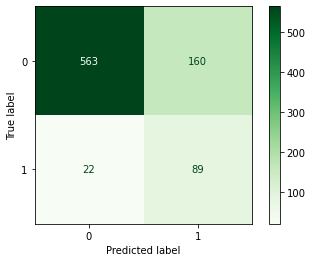

------------------------------------
Testing Accuracy for Our Classifier: 78.18%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       723
           1       0.36      0.80      0.49       111

    accuracy                           0.78       834
   macro avg       0.66      0.79      0.68       834
weighted avg       0.88      0.78      0.81       834

Train AUC: 0.8202668403133508
Test AUC: 0.8485290269522634
------------------------------------


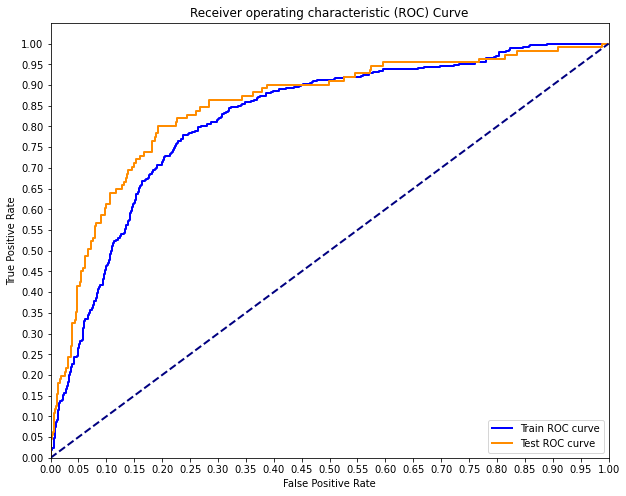

In [21]:
model_control(pipeline_lr, X_train_over, X_test, y_train_over, y_test)


The results suggest that the model performs reasonably well, with improved accuracy, when trained on the oversampled data. Additionally, the model's performance on the testing data is assessed with the decision tree classifier, showing similar accuracy and good ability to distinguish between classes.

#### SMOTE

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(sampling_strategy=0.7)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    2850
1     483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

0    2127
1    1488
Name: churn, dtype: int64


In [23]:
lr_smote = LogisticRegression(fit_intercept=False, 
                           C=10e16,  
                           solver='liblinear', 
                           max_iter=10000, 
                           random_state=123) 

lr_smote.fit(X_train_resampled, y_train_resampled)

print('Train Score:', pipeline_lr.score(X_train_resampled, y_train_resampled))
print('Test Score:', pipeline_lr.score(X_test, y_test))

Train Score: 0.6365145228215767
Test Score: 0.8657074340527577


The training score of 0.6326 suggests that the model is not as accurate on the resampled training data compared to some of the other models previously evaluated. It may indicate that the model is underfitting the data or that the chosen hyperparameters are not optimal for this specific dataset.

The testing score of 0.8657 indicates that the model performs well on the testing dataset, with an accuracy of about 86.57%. It's important to ensure that the testing dataset is not used in the training process to obtain an unbiased evaluation of the model's performance.

#### K NEAREST NEIGHBORS

##### The Model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=5)

# Fit the model

knn_clf.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf.score(X_train_scaled, y_train))
print('Test Score:', knn_clf.score(X_test_scaled, y_test))

Train Score: 0.9179671868747499
Test Score: 0.9004796163069544


The training score is approximately 0.918, indicating that the KNN classifier correctly classifies about 91.8% of the samples in the training dataset. This score represents the accuracy of the model on the training data.
The testing score is approximately 0.9005, suggesting that the KNN classifier correctly classifies about 90.05% of the samples in the testing dataset. This score represents the accuracy of the model on unseen or test data.


##### Predictions

In [25]:
model_predictions(knn_clf, X_train_scaled, X_test_scaled, y_train, y_test)


Training Values 
 0    2294
1     205
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.917967
1    0.082033
Name: churn, dtype: float64



Testing Values:  
 0    751
1     83
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.90048
1    0.09952
Name: churn, dtype: float64


The KNN classifier demonstrates a significant class imbalance, as evident in both the training and testing datasets. Class 0 is dominant, with a much larger number of samples compared to class 1.
The KNN classifier has a high training accuracy for class 0, suggesting it performs well in correctly classifying class 0 instances. However, it performs poorly on class 1 in the training data.
In the testing dataset, a similar pattern is observed. The model has high accuracy for class 0 but very low accuracy for class 1.
This class imbalance can lead to an accuracy paradox, where high overall accuracy may not be representative of the model's performance on the minority class (class 1). It's essential to consider other evaluation metrics like precision, recall, and F1-score, especially when dealing with imbalanced datasets. Additionally, techniques such as resampling or adjusting the model's threshold can be used to address class imbalance issues.

##### Confusion Matrix

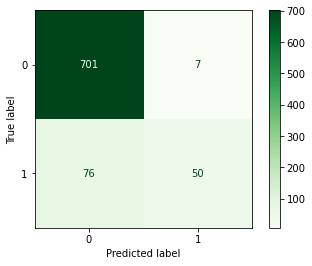

------------------------------------
Testing Accuracy for Our Classifier: 90.05%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       708
           1       0.88      0.40      0.55       126

    accuracy                           0.90       834
   macro avg       0.89      0.69      0.75       834
weighted avg       0.90      0.90      0.88       834



In [26]:
confusion_matrix(knn_clf, X_test_scaled, y_test)


The testing accuracy for the classifier is 90.05%. This means that the classifier correctly classifies about 90.05% of the samples in the testing dataset.
For Class 0 (Label 0):

Precision: Precision for class 0 is 0.90. This means that when the model predicts class 0, it is correct 90% of the time.
Recall: Recall for class 0 is 0.99. This indicates that the model correctly identifies 99% of the actual class 0 cases.
F1-score: The F1-score for class 0 is 0.94. The F1-score is the harmonic mean of precision and recall and provides a balanced measure of accuracy.
For Class 1 (Label 1):

Precision: Precision for class 1 is 0.88. This means that when the model predicts class 1, it is correct 88% of the time.
Recall: Recall for class 1 is 0.40. This indicates that the model correctly identifies 40% of the actual class 1 cases.
F1-score: The F1-score for class 1 is 0.55. This F1-score reflects the balance between precision and recall for class 1.

##### ROC Curve

Train AUC: 0.9623437610338254
Test AUC: 0.8680835799479868
------------------------------------


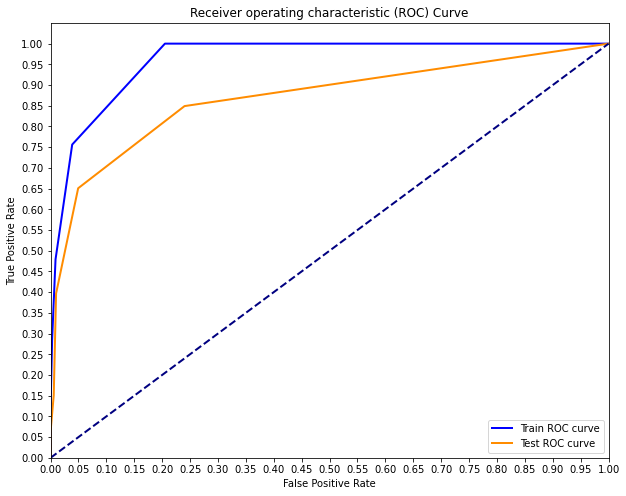

In [27]:
plot_roc_pp(knn_clf, X_train_scaled, X_test_scaled, y_train, y_test)


The training AUC of 0.9623 is very high, indicating that the model has learned to separate the classes effectively in the training dataset, and it fits the training data well.
The testing AUC of 0.8681 is also relatively high, suggesting that the model generalizes well to the testing data. While it may not perform as well as it did on the training data, an AUC of 0.8681 is a positive sign, indicating that the model is still capable of distinguishing between the classes in the testing dataset.

#### Model Tuning

##### VIF score


Multicollinearity is a concern in K-Nearest Neighbors (KNN) and many other machine learning algorithms, as it can impact the model's performance and make feature importance interpretation difficult. To check for multicollinearity using a heatmap, you typically need to compute the correlation matrix for your dataset and then visualize it using a heatmap

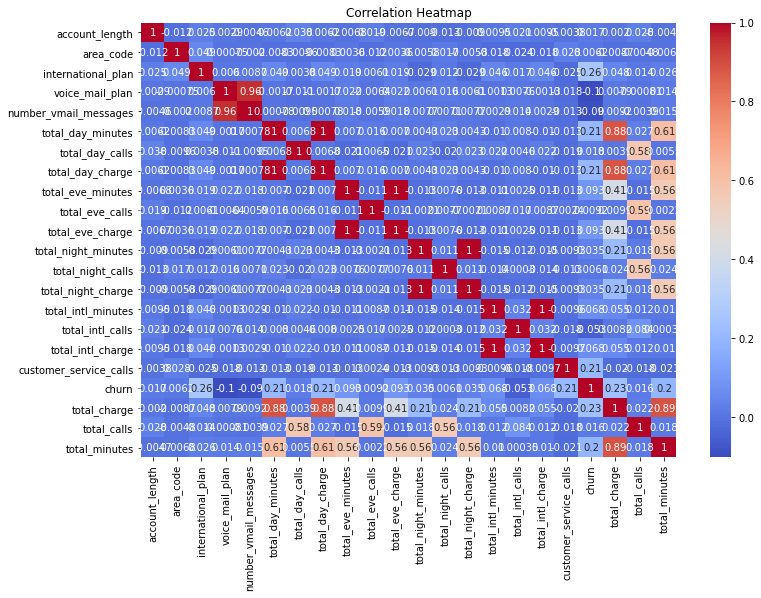

In [28]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

As we can see from the heatmap above, there are highly correlated columns as expected. Eliminating highly correlated columns using VIF (Variance Inflation Factor) is a common approach to address multicollinearity in the dataset. VIF measures how much the variance of an estimated regression coefficient is increased due to collinearity in the predictors. The higher the VIF, the stronger the multicollinearity.



In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)
vif = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif_scores = list(zip(X_train.columns, vif))
vif_scores.sort(key=lambda x: x[1], reverse=True,)
print('VIF SCORES')   
print((vif_scores))
print('------------------------------')
columns_to_use = list()
for vif_score in vif_scores:
    if vif_score[1] < 10:
        columns_to_use.append(vif_score[0])
print('Columns to Use For Logistic Regression','\n', columns_to_use)

VIF SCORES
[('total_day_calls', inf), ('total_eve_calls', inf), ('total_night_calls', inf), ('total_intl_calls', inf), ('total_calls', inf), ('total_day_minutes', 125650862.22583802), ('total_day_charge', 125088490.19478323), ('total_eve_minutes', 38071272.99777575), ('total_eve_charge', 37681699.64937254), ('total_night_minutes', 11228811.167547043), ('total_night_charge', 10662716.339477567), ('total_minutes', 4320288.6854152875), ('total_intl_charge', 992050.561874533), ('total_intl_minutes', 992020.339665135), ('total_charge', 43738.52989158381), ('voice_mail_plan', 16.184906535968867), ('number_vmail_messages', 15.793920198480455), ('account_length', 7.283348833186514), ('customer_service_calls', 2.3840710876616713), ('international_plan', 1.1203480460560564)]
------------------------------
Columns to Use For Logistic Regression 
 ['account_length', 'customer_service_calls', 'international_plan']


Multicollinearity, especially when VIF scores are very high or infinite, can be problematic in logistic regression and other linear models. It makes it challenging to identify the contribution of individual features to the model.
To address multicollinearity, I  selected columns that have lower VIF scores and are less correlated with other features. These columns are expected to work better in a logistic regression model, as they are less likely to introduce collinearity issues.

In [30]:
X_train = X_train[columns_to_use]
X_test = X_test[columns_to_use]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf_vif = KNeighborsClassifier(n_neighbors=5)

# Fit the model

knn_clf_vif.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf_vif.score(X_train_scaled, y_train))
print('Test Score:', knn_clf_vif.score(X_test_scaled, y_test))

Train Score: 0.8895558223289316
Test Score: 0.8525179856115108


After addressing multicollinearity and selecting a subset of features with lower VIF scores, you trained a KNN classifier with these features.
The model achieved a good level of accuracy on both the training and testing datasets. The accuracy on the testing dataset (85.25%) suggests that the model generalizes well to unseen data.
It's important to keep in mind that accuracy is just one metric, and further evaluation with other metrics like precision, recall, and F1-score, as well as domain-specific considerations, may be necessary to assess the model's overall performance.

Train Score: 0.8895558223289316
Test Score: 0.8525179856115108
------------------------------------
Training Values 
 0    2223
1     276
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.889556
1    0.110444
Name: churn, dtype: float64



Testing Values:  
 0    711
1    123
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.852518
1    0.147482
Name: churn, dtype: float64


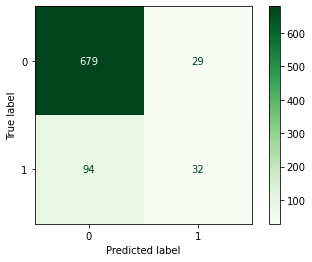

------------------------------------
Testing Accuracy for Our Classifier: 85.25%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       708
           1       0.52      0.25      0.34       126

    accuracy                           0.85       834
   macro avg       0.70      0.61      0.63       834
weighted avg       0.82      0.85      0.83       834

Train AUC: 0.8809053032977896
Test AUC: 0.7075990942516366
------------------------------------


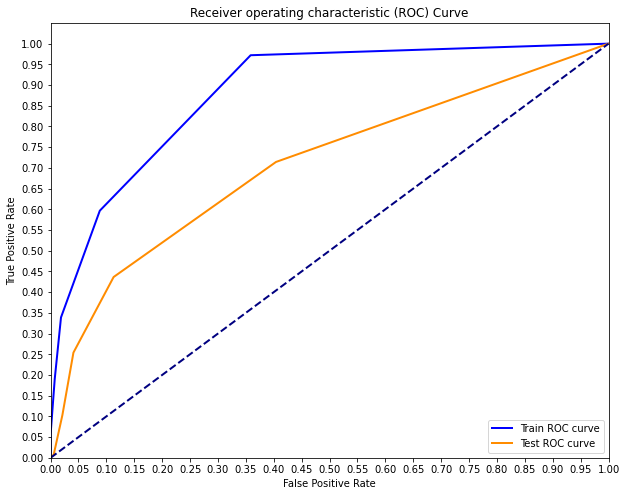

In [31]:
model_control_pp(knn_clf_vif, X_train_scaled, X_test_scaled, y_train, y_test)


#### Best K Value

Choosing the best "k" is a critical hyperparameter tuning step, as it can significantly impact the model's performance. The best "k" value may vary from one dataset to another, so it's a good practice to search for it when applying KNN to a new problem.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test, y_test)
        if test_score > best_score:
            best_k = k
            best_score = test_score
    
    print("Best Value for k: {}".format(best_k))
    
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 3


The function found that the best value for "k" is 3. This means that when "k" is set to 3 in the KNN classifier, it results in the highest testing accuracy on the provided dataset. This value of "k" is considered optimal for making predictions with the KNN model on this dataset.

* Now that we have identified the best "k" as 3, we can proceed with using this value in your KNN classifier. 

In [34]:

knn_3_clf = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn_3_clf.fit(X_train_scaled, y_train)

print('Train Score:', knn_3_clf.score(X_train_scaled, y_train))
print('Test Score:', knn_3_clf.score(X_test_scaled, y_test))

Train Score: 0.9343737494997999
Test Score: 0.9040767386091128


The KNN classifier, configured with the best "k" value of 3, has achieved high accuracy on both the training and testing datasets.
The training accuracy of 93.44% suggests that the model fits the training data very well, correctly classifying the majority of samples.
The testing accuracy of 90.41% indicates that the model generalizes effectively to unseen data, maintaining a high level of accuracy.
These results suggest that the KNN model with the selected "k" value is performing well and is a good choice for making predictions on this dataset. I

Train Score: 0.9343737494997999
Test Score: 0.9040767386091128
------------------------------------
Training Values 
 0    2335
1     164
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.934374
1    0.065626
Name: churn, dtype: float64



Testing Values:  
 0    754
1     80
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.904077
1    0.095923
Name: churn, dtype: float64


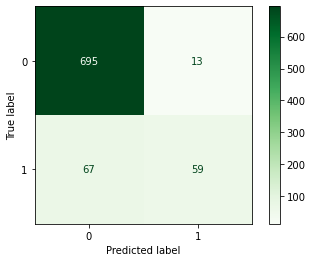

------------------------------------
Testing Accuracy for Our Classifier: 90.41%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       708
           1       0.82      0.47      0.60       126

    accuracy                           0.90       834
   macro avg       0.87      0.72      0.77       834
weighted avg       0.90      0.90      0.89       834

Train AUC: 0.97388628654076
Test AUC: 0.8538752129853825
------------------------------------


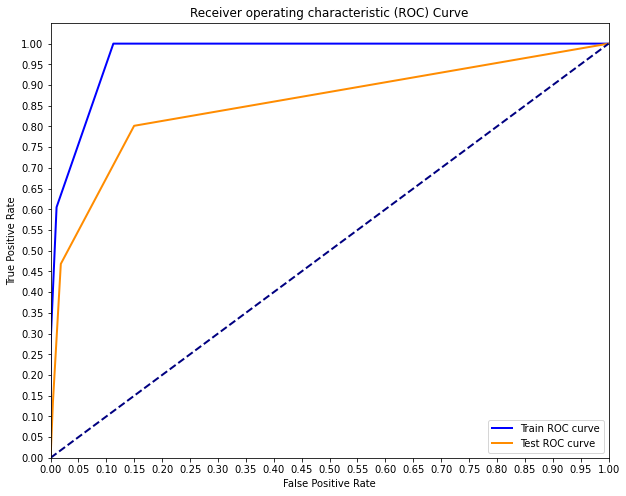

In [35]:
model_control_pp(knn_3_clf, X_train_scaled, X_test_scaled, y_train, y_test)


#### GridSearch
Grid Search will automatically test all combinations of hyperparameters and return the best combination. This is a powerful technique for hyperparameter tuning and helps find the optimal settings for your KNN classifier.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf_gs = KNeighborsClassifier()

knn_grid = {'n_neighbors': [3, 5, 7, 9],
            'weights':['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan'],
            'n_jobs': [-1]}

knn_gridsearch = GridSearchCV(estimator=knn_clf_gs, 
                              param_grid=knn_grid, 
                              cv=5,
                              return_train_score=True)



# Fit to the data
knn_gridsearch.fit(X_train_scaled, y_train)

# Best parameters for our Decision Tree model:
print('Best parameters for Our KNN Model:')
knn_gridsearch.best_params_

Best parameters for Our KNN Model:


{'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'uniform'}

In [37]:
knn_clf_gs = KNeighborsClassifier(metric='manhattan', 
                                  n_jobs=-1, 
                                  n_neighbors=7, 
                                  weights='uniform')

knn_clf_gs.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf_gs.score(X_train_scaled, y_train))
print('Test Score:', knn_clf_gs.score(X_test_scaled, y_test))

Train Score: 0.9131652661064426
Test Score: 0.8968824940047961


Train Score: 0.9131652661064426
Test Score: 0.8968824940047961
------------------------------------
Training Values 
 0    2282
1     217
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.913165
1    0.086835
Name: churn, dtype: float64



Testing Values:  
 0    748
1     86
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.896882
1    0.103118
Name: churn, dtype: float64


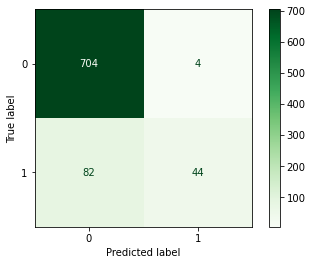

------------------------------------
Testing Accuracy for Our Classifier: 89.69%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       708
           1       0.92      0.35      0.51       126

    accuracy                           0.90       834
   macro avg       0.91      0.67      0.72       834
weighted avg       0.90      0.90      0.88       834

Train AUC: 0.9536272025149928
Test AUC: 0.8722928436911488
------------------------------------


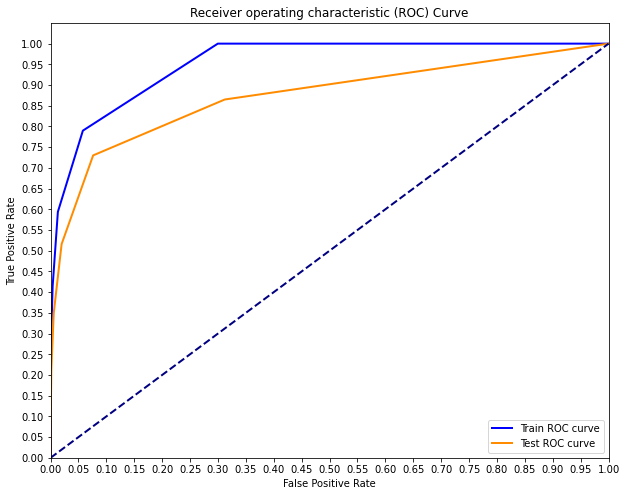

In [38]:
model_control_pp(knn_clf_gs, X_train_scaled, X_test_scaled, y_train, y_test)


### Decision Trees

#### Model

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

"""
    We will use StandardScaler to scale our training data.
    Set random_state to 123 for our Decision Tree model. 
"""


scaler = StandardScaler()
model = DecisionTreeClassifier(random_state=123)                       

pipeline_dt = Pipeline([('ss', scaler), 
                        ('m', model), 
                       ])

# Fit the model

pipeline_dt.fit(X_train, y_train)

print('Train Score:', pipeline_dt.score(X_train, y_train))
print('Test Score:', pipeline_dt.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.9364508393285371


The vanilla model has a high test score of 94%. 

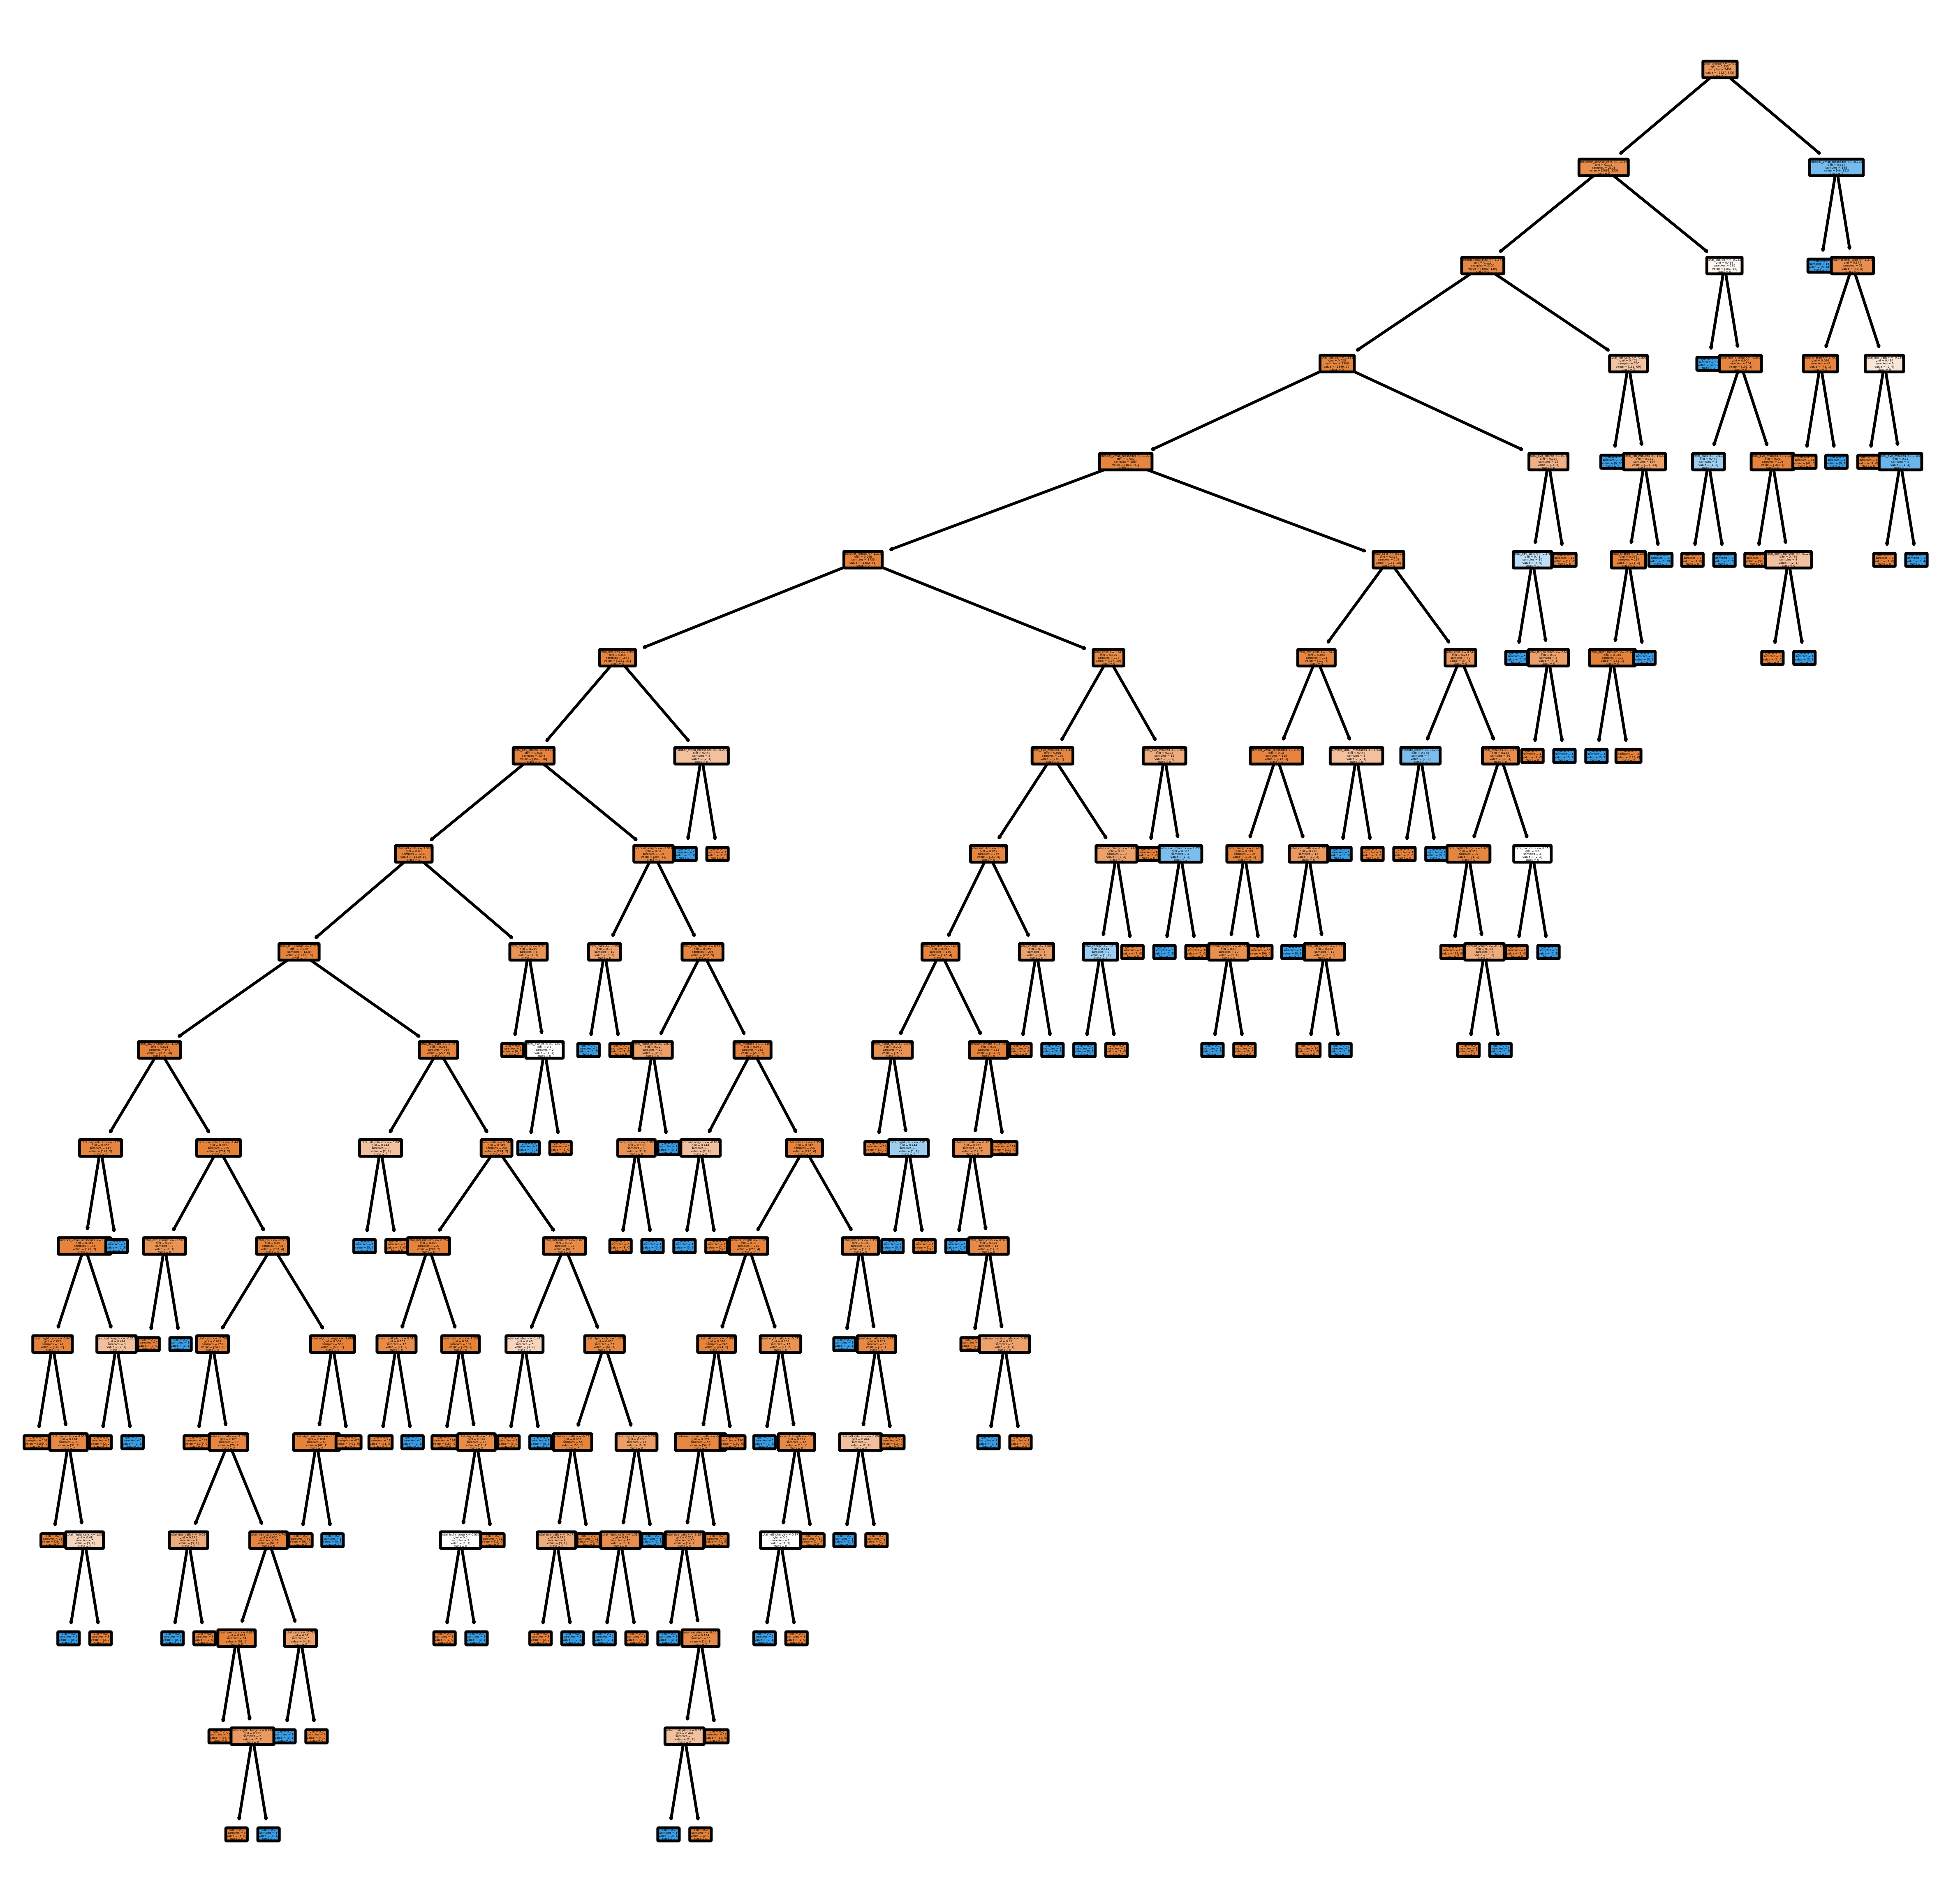

In [40]:
# Visualizing the decision tree
plt.figure(figsize=(12,12), dpi=500, edgecolor='black')

tree.plot_tree(model, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

##### Predictions

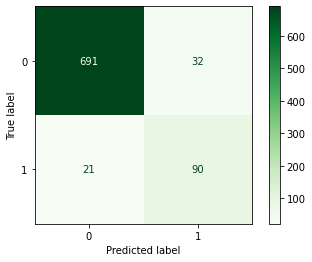

------------------------------------
Testing Accuracy for Our Classifier: 93.65%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       723
           1       0.74      0.81      0.77       111

    accuracy                           0.94       834
   macro avg       0.85      0.88      0.87       834
weighted avg       0.94      0.94      0.94       834



In [41]:
confusion_matrix(pipeline_dt, X_test, y_test)


The testing accuracy of 93.65% suggests that the model performs well on the testing dataset, with a high level of correct classifications.
The classification report provides a more detailed understanding of the model's performance, indicating good precision and recall for both classes, although class 1 has lower precision and recall compared to class 0.
The F1-scores provide a balance between precision and recall, with a high F1-score for class 0 and a somewhat lower F1-score for class 1.
Overall, the model appears to have a good balance between precision and recall, especially for class 0, and is effective in classifying the majority class (class 0) while maintaining reasonable performance for the minority class (class 1).

#### ROC Curve

Train AUC: 1.0
Test AUC: 0.8832753915741469
------------------------------------


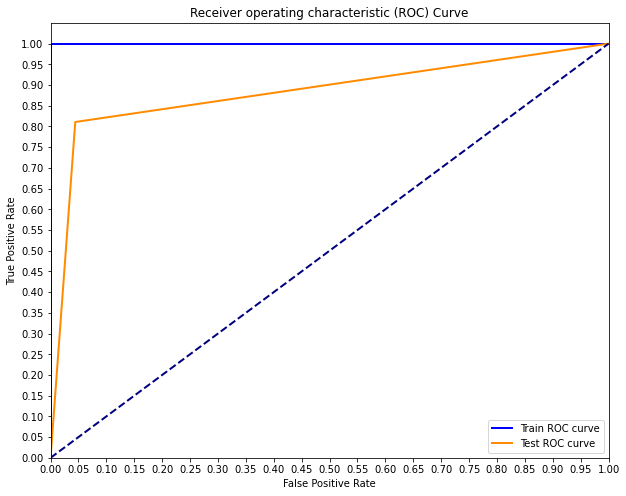

In [42]:
plot_roc_pp(pipeline_dt, X_train, X_test, y_train, y_test)


The AUC value of 0.8833 on the testing dataset indicates that the model has reasonably good discriminative power for classifying instances on the testing data, but it's not as perfect as the training AUC. This is expected, as models should perform slightly worse on unseen data compared to training data. An AUC of 0.8833 suggests that the model is effective in distinguishing between the classes but may still make some classification errors on the testing data.

### Model Tuning

#### Class Imbalance

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=123)
# Fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over))

dt_clf_os = DecisionTreeClassifier(random_state=123)                       

dt_clf_os.fit(X_train_over, y_train_over)

Counter({0: 2127, 1: 2127})


DecisionTreeClassifier(random_state=123)

Train Score: 1.0
Test Score: 0.9520383693045563
------------------------------------
Training Values 
 0    4254
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    1.0
Name: churn, dtype: float64



Testing Values:  
 0    794
1     40
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.952038
1    0.047962
Name: churn, dtype: float64


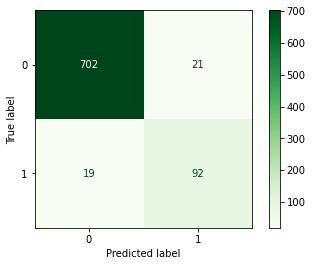

------------------------------------
Testing Accuracy for Our Classifier: 95.2%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       723
           1       0.81      0.83      0.82       111

    accuracy                           0.95       834
   macro avg       0.89      0.90      0.90       834
weighted avg       0.95      0.95      0.95       834

Train AUC: 1.0
Test AUC: 0.899891592837651
------------------------------------


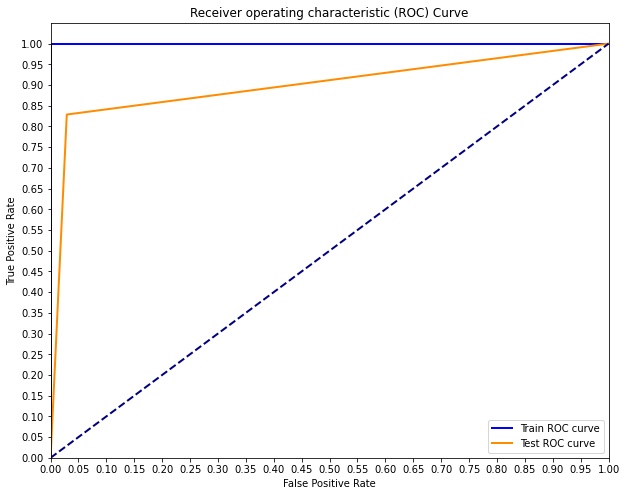

In [44]:
model_control_pp(dt_clf_os, X_train_over, X_test_scaled, y_train_over, y_test)


### XGBOOST

In [45]:
"""
   - Preform train/test split.
   - Scale data.
   - Initiate random XGBoost classifier.
   - Fit the model.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_clf = xgb.XGBClassifier(max_depth=5, 
                            learning_rate=0.1, 
                            random_state=123)

# Fit the model

xgb_clf.fit(X_train_scaled, y_train)

print('Train Score:', xgb_clf.score(X_train_scaled, y_train))
print('Test Score:', xgb_clf.score(X_test_scaled, y_test))

Train Score: 0.9819927971188476
Test Score: 0.9760191846522782


The XGBoost classifier has been trained and evaluated on both the training and testing data. It exhibits high accuracy on both the training and testing datasets, indicating that it performs well and generalizes effectively to unseen data. 

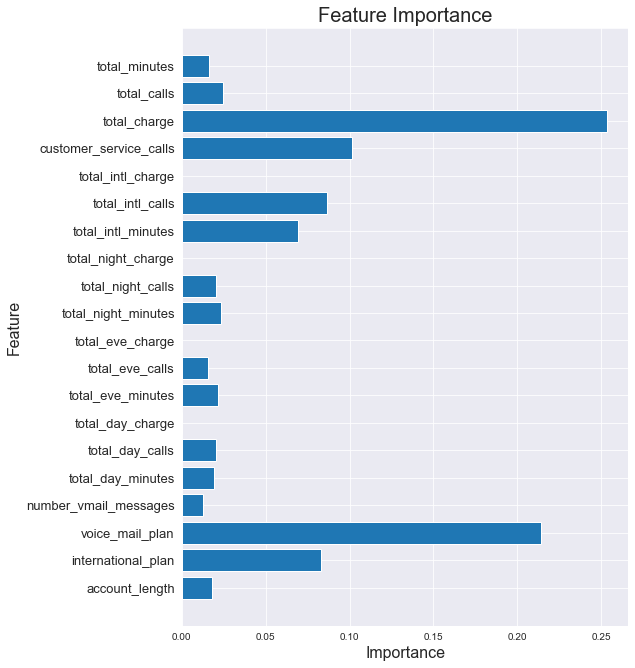

In [46]:
plot_feature_importances(xgb_clf, X, X_train_scaled)


#### Predictions

In [47]:
model_predictions(xgb_clf, X_train_scaled, X_test_scaled, y_train, y_test)


Training Values 
 0    2454
1      45
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.981993
1    0.018007
Name: churn, dtype: float64



Testing Values:  
 0    814
1     20
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.976019
1    0.023981
Name: churn, dtype: float64


#### Confusion Matrix

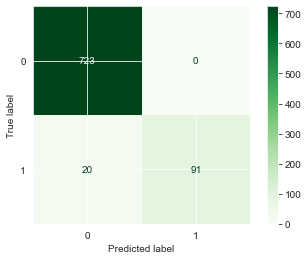

------------------------------------
Testing Accuracy for Our Classifier: 97.6%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       723
           1       1.00      0.82      0.90       111

    accuracy                           0.98       834
   macro avg       0.99      0.91      0.94       834
weighted avg       0.98      0.98      0.97       834



In [48]:
confusion_matrix(xgb_clf, X_test_scaled, y_test)


The testing accuracy of 97.6% suggests that the XGBoost classifier performs exceptionally well on the testing dataset, with a high level of correct classifications.
The classification report provides a more detailed understanding of the model's performance, indicating excellent precision, recall, and F1-scores for both classes, with slightly lower recall for class 1.
Overall, the model exhibits excellent classification performance on both classes, with high precision and F1-scores, making it a strong candidate for this classification task.

####  ROC Curve


Train AUC: 0.9999418636981765
Test AUC: 0.9248003189911903
------------------------------------


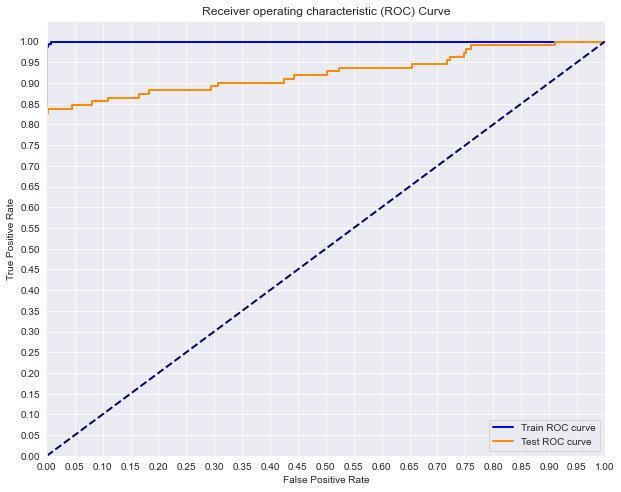

In [49]:
plot_roc_pp(xgb_clf, X_train_scaled, X_test_scaled, y_train, y_test)


An AUC of approximately 0.9999 on the training dataset suggests very high discrimination between the two classes. In other words, the model can distinguish between the positive and negative classes with almost perfect accuracy on the training data. This indicates that the model has learned the training data very well and can separate the classes effectively.
The AUC of approximately 0.9248 on the testing dataset is a measure of the model's ability to discriminate between the two classes on unseen data. An AUC value of 0.9248 indicates that the model performs well in distinguishing between the classes on the testing data, but it is not as perfect as the training AUC. This is expected, as models typically perform slightly worse on unseen data compared to training data.
In summary, while the training AUC is almost perfect (0.9999), indicating potential overfitting, the testing AUC of 0.9248 suggests that the model generalizes well and performs well in distinguishing between the classes on unseen data. It's important to balance model performance on training and testing data, as overly complex models with high training AUC may not perform well in practice due to overfitting.

### Model Tuning

#### GridSearch

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_clf_gs = xgb.XGBClassifier(random_state=123)

xgb_grid = {
            'learning_rate': [0.01, 0.1, 0.5], 
            'gamma': [0, 0.01, 0.1], 
            'max_depth': [2, 5, 6, 10], 
            'min_child_weight': [0.1, 1, 10], 
            'subsample': [0.5, 0.7, 0.9], 
            'n_estimators': [5, 10, 20, 100]
           }

xgb_gridsearch = GridSearchCV(estimator=xgb_clf_gs, 
                              param_grid=xgb_grid, 
                              cv=5, 
                              return_train_score=True)

xgb_gridsearch.fit(X_train_scaled, y_train)

print('Best Parameters for Our XGBoost Model:')
xgb_gridsearch.best_params_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_clf_gs = xgb.XGBClassifier(gamma=0, 
                               learning_rate=0.1, 
                               max_depth=6, 
                               min_child_weight=0.1, 
                               n_estimators=100, 
                               subsample=0.5, 
                               random_state=123)

# Fit the model

xgb_clf_gs.fit(X_train_scaled, y_train)

print('Train Score:', xgb_clf_gs.score(X_train_scaled, y_train))
print('Test Score:', xgb_clf_gs.score(X_test_scaled, y_test))

In [ ]:
plot_feature_importances(xgb_clf_gs, X_train_scaled)


In [ ]:
model_control_pp(xgb_clf_gs, X_train_scaled, X_test_scaled, y_train, y_test)
